In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("income.csv")  
df.head()


,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


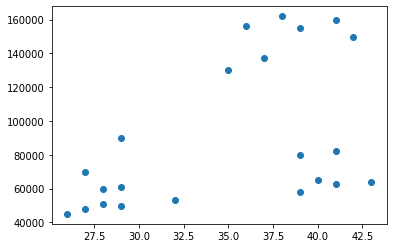

In [8]:
plt.scatter(df['Age'],df['Income($)'])

In [9]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
# can fit and predict at the same time with every model, by the way
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [11]:
# bring in result into df
df['cluster']  = y_predicted

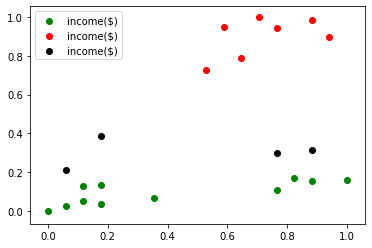

In [40]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0.Age,df0['Income($)'],color='green', label='income($)')
plt.scatter(df1.Age,df1['Income($)'],color='red', label='income($)')
plt.scatter(df2.Age,df2['Income($)'],color='black', label='income($)')

# plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.legend()

In [31]:
# Problem here is that the scaling is messed up
# The y axis goes from 40K to 160K (very wide), while X axis is only 27-42 (too narrow)

# Use MinMax scaler to scale the income feature
# It will rescale income to a range between 0 and 1
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
# Do the same scalling for Age (between 0 and 1)
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [44]:
# Now retrain the model to see if clustering is better
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [46]:
# append new result
df['cluster'] = y_predicted

In [48]:
# Check the cluster centers 'centroids', which are dividing the clusters based on proximity
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

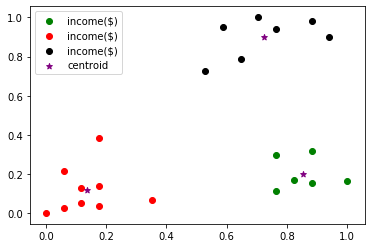

In [49]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0.Age,df0['Income($)'],color='green', label='income($)')
plt.scatter(df1.Age,df1['Income($)'],color='red',label='income($)')
plt.scatter(df2.Age,df2['Income($)'],color='black', label='income($)')

# plot the k 'centroids' (x is the 0th column, y is the 1st column)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.legend()

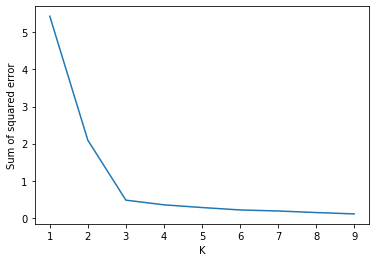

In [51]:
### Check the elbow plot method (for more complicated datasets where you will need to figure out how many k's to use)
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)  # this appends the SSE error to each iteration

# plot the elbow plot (result: k=3 here, at the elbow hinge point of the graph)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)